In [ ]:
# from model_testing import Models, confusion_matrix
# md = Models("46_speaker_original\Test\Speaker20\Speaker20_part7.wav")
# confusion_matrix(md.clf_10, md.X, md.y)

In [12]:
import pickle
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from pycm import *

class Models:
    file = None
    def __init__(self, file):
        with open('models\scaler.pkl', 'rb') as f:
            self.scaler = pickle.load(f)
            
        with open('models\model_20.pkl', 'rb') as f:
            self.clf_20 = pickle.load(f)
            
        with open('models\model_10.pkl', 'rb') as f:
            self.clf_10 = pickle.load(f)
            
        with open('models\model_5.pkl', 'rb') as f:
            self.clf_5 = pickle.load(f)
        
        with open('models\model_1.pkl', 'rb') as f:
            self.clf_1 = pickle.load(f)

        self.data = pd.read_csv('Test_speaker.csv')
        self.data = self.data.drop(['Unnamed: 0'], axis = 1)
        self.X = self.scaler.transform(np.array(self.data.drop(['label'], axis=1), dtype = float))
        self.y = np.array(self.data['label'],dtype=str)

        self.file = file
        self.sample, self.sr = librosa.load(file)

def fit_model(model, X, y):
    y_pred = model.predict(X)
    return y_pred, y

def accuracy(model, X, y):
    y_pred, y = fit_model(model, X, y)
    print(accuracy_score(y_pred, y))


def confidence(model, scaler, data, sr):
    feature = []
    y = np.array(data)
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    rms = np.mean(librosa.feature.rms(y=y))
    spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    zcr= np.mean(librosa.feature.zero_crossing_rate(y))

    feature.extend([chroma_stft, rms, spec_cent, spec_bw, rolloff, zcr])

    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    for i, m in enumerate(mfcc):
        feature.append(np.mean(m))

    feature = np.array(feature)

    X = feature.reshape(1,-1)
    X = scaler.transform(X)
    prob = model.predict_proba(X)
    np.set_printoptions(suppress=True)
    prob = prob.flatten()
    column_name = [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 
                       26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 
                       40, 41, 42, 43, 44, 45, 46, 5, 6, 7, 8, 9]
    name = np.array(column_name)

    confidence = np.column_stack((name, prob))
    confidence = confidence[confidence[:, 1].argsort()[::-1]]

    print(confidence[0, 1],"\t", confidence[0,0])

def model_report(model, X, y):
    y_pred = model.predict(X)
    clf_report = classification_report(y,
                                   y_pred,
                                   output_dict=True)
    fig, ax = plt.subplots(figsize=(9, 20))
    ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='plasma', fmt=".6f")
    plt.show()

def confusion_matrix(model, X, y):
    y_pred, y = fit_model(model, X, y)
    cm = ConfusionMatrix(actual_vector=y, predict_vector=y_pred)
    cm = cm.to_array(normalized=True)
    column_name = [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                   2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
                   3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 
                   4, 40, 41, 42, 43, 44, 45, 46, 5, 6, 7, 8, 9]
    
    mtrix = pd.DataFrame(cm, columns=column_name, index= column_name)

    plt.figure(figsize=(20, 15))
    # sns.heatmap(mtrix[(mtrix > 0) & (mtrix <= 0.9)], annot=True, cmap='BrBG')
    ax = sns.heatmap(mtrix[(mtrix > 0.001)], annot=True, cmap='BrBG')
    # ax = sns.heatmap(mtrix, annot=True, cmap='BrBG')
    plt.xlabel('Predict', fontsize = 20) # x-axis label with fontsize 15
    plt.ylabel('Auctual', fontsize = 20) # y-axis label with fontsize 15
    fig = ax.get_figure()
    plt.show()
    fig.savefig('cm10min.png')


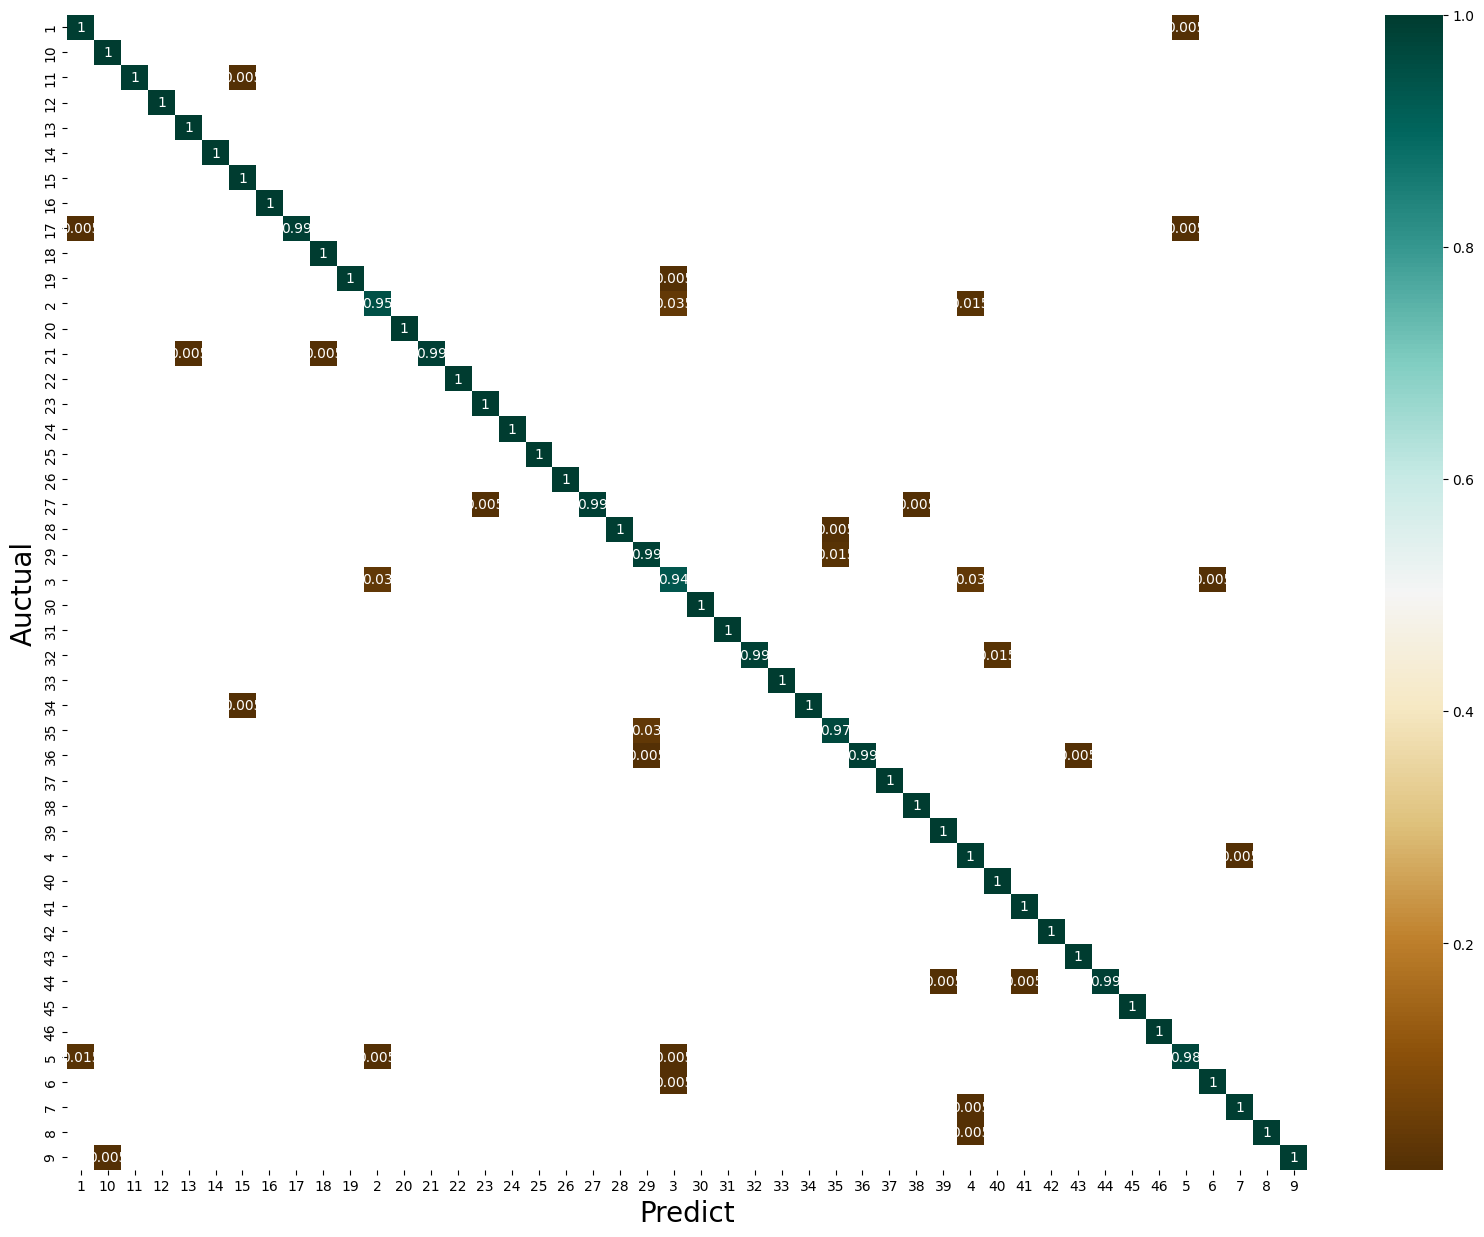

In [13]:
if __name__ == '__main__':
    md = Models("46_speaker_original\Test\Speaker20\Speaker20_part7.wav")
    # report(md.clf_1, md.X, md.y)
    # confidence(md.clf_20, md.scaler, md.sample, md.sr)
    confusion_matrix(md.clf_10, md.X, md.y)

In [30]:
from scipy.stats import truncnorm

# Define the parameters for the truncated normal distribution
a, b = 80, 30000  # Truncation limits
mean, std_dev = 5000, 12890 # Mean and standard deviation

# Calculate the truncated normal distribution
truncated_normal = truncnorm(a, b, loc=mean, size=17)

# # Generate random samples
# samples = truncated_normal.rvs(size=17)

# print(samples)

print(truncated_normal)

TypeError: _parse_args() got an unexpected keyword argument 'size'

In [25]:
import numpy as np

# Number of elements
n = 17

# Desired mean
mean = 5000

# Generate 16 random numbers
random_numbers = np.random.randint(80, 30000, 16)

# Calculate the sum of the 16 numbers
sum_random_numbers = np.sum(random_numbers)

# Calculate the 17th number to ensure the mean is 5000
last_number = (mean * n) - sum_random_numbers

# Combine the numbers
numbers = np.append(random_numbers, last_number)

print("Generated numbers:", numbers)
print("Mean of the numbers:", np.mean(numbers))

Generated numbers: [  20718   15915   13572   20179   29863    6877   11530   14590    3867
   18290   22687    5681    1267   23263    1201   28760 -153260]
Mean of the numbers: 5000.0


In [33]:
from scipy.stats import truncnorm  
    
numargs = truncnorm .numargs  
a, b = 15000, 25000
rv = truncnorm (a, b)  
# Random Variates  
R = truncnorm .rvs(a, b, size = 17, loc=5000)  
print ("Random Variates : \n", R)  

Random Variates : 
 [20000.00001812 20000.00016416 20000.0000048  20000.00000034
 20000.0000361  20000.00014263 20000.00008819 20000.00006601
 20000.00008633 20000.0000141  20000.00005743 20000.00015723
 20000.0000023  20000.00007624 20000.00002622 20000.00003754
 20000.00006732]


In [50]:
import random
nums = [random.randint(80, 30000) for x in range(5)]
print(type(nums))
lmao = sum(nums)/len(nums)
nums = [x - lmao + 5000 for x in nums]
print(nums)
print(np.mean(nums))

<class 'list'>
[-2265.6000000000004, -1050.6000000000004, 3844.3999999999996, 6564.4, 17907.4]
5000.0
